In [1]:

from pandas_profiling import ProfileReport

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import split_scale


In [3]:
df = wrangle.wrangle_telco()

In [4]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [5]:
train, test = split_scale.split_my_data(df)

In [23]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
119,0707-HOVVN,75.50,70,5212.65
1424,8380-MQINP,20.30,55,1079.05
385,2307-FYNNL,109.05,65,7108.20
1140,6797-LNAQX,98.30,70,6859.50
1504,8879-XUAHX,116.25,71,8564.75


In [9]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind="reg")
    plt.show()

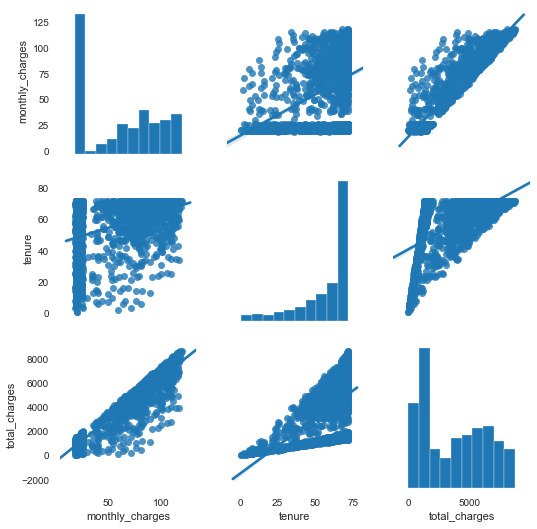

In [10]:
plot_variable_pairs(df)

In [13]:
def months_to_years(df):
    df['tenure_years']=round(df.tenure/12).astype('category')
    return df

In [14]:
months_to_years(df)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,6.0
1,0014-BMAQU,84.65,63,5377.80,5.0
2,0016-QLJIS,90.45,65,5957.90,5.0
3,0017-DINOC,45.20,54,2460.55,4.0
4,0017-IUDMW,116.80,72,8456.75,6.0
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,6.0
1691,9972-EWRJS,19.25,67,1372.90,6.0
1692,9975-GPKZU,19.75,46,856.50,4.0
1693,9993-LHIEB,67.85,67,4627.65,6.0


In [15]:
df.dtypes

customer_id          object
monthly_charges     float64
tenure                int64
total_charges       float64
tenure_years       category
dtype: object

In [18]:
def plot_categorical_and_continuous_vars(df):
    plt.figure(figsize=(16,8))
    plt.subplot(1,3,1)
    plt.bar(df.tenure_years,df.total_charges)
    plt.xlabel('Tenure in years')
    plt.ylabel('Total charges in dollars')
    plt.subplot(1,3,2)
    #sns.catplot(x="tenure_years", y="total_charges", data=df)
    sns.stripplot(df.tenure_years,df.total_charges)
    plt.subplot(1,3,3)
    plt.pie(df.groupby('tenure_years')['total_charges'].sum(),labels=list(df.tenure_years.unique()),autopct='%1.1f%%',shadow=True)
    plt.title(" Percent of total charges by tenure")
    plt.show()

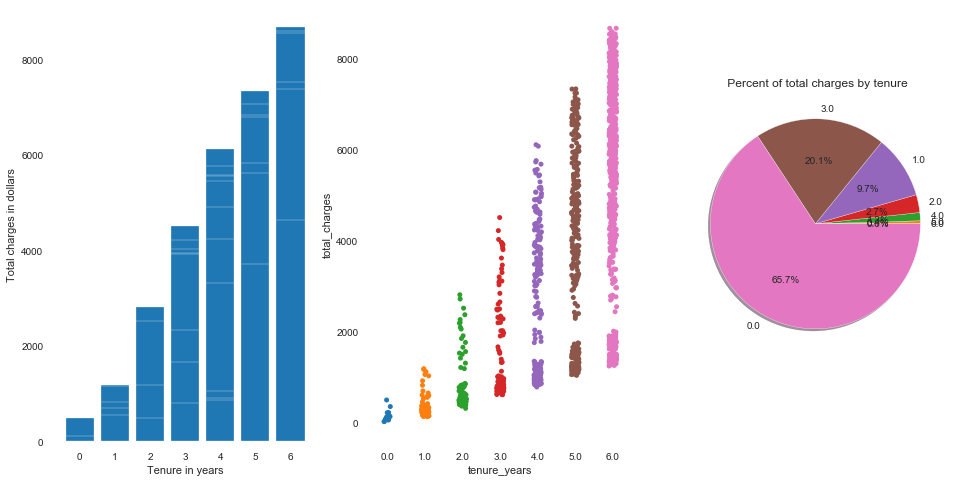

In [19]:
plot_categorical_and_continuous_vars(df)